In [15]:
import movingpandas as mpd
import geopandas as gpd
import pandas as pd
from datetime import datetime, timedelta
from shapely.geometry import LineString, Point
from shapely.wkt import loads
import matplotlib.pyplot as plt

In [2]:
hvplot_defaults = {'tiles':'CartoLight', 'frame_height':320, 'frame_width':320, 'cmap':'Viridis', 'colorbar':True}
kwargs = {**hvplot_defaults, 'c':'speed', 'line_width':7, 'clim':(0,20)}

In [3]:
gdf = gpd.read_parquet('output_data/geolife.parquet')

In [4]:
gdf['time'] = pd.to_datetime(gdf['time'])
gdf.crs = 'EPSG:4326'

In [5]:
gdf.head()

,latitude,longitude,altitude,date,date_str,time,trajectory_id,mode,geometry,user_id
0,39.974294,116.399741,492.0,39816.056644,2009-01-03,2009-01-03 01:21:34,20090103012134,unknown,POINT (116.39974 39.97429),135
1,39.974292,116.399592,492.0,39816.056655,2009-01-03,2009-01-03 01:21:35,20090103012134,unknown,POINT (116.39959 39.97429),135
2,39.974309,116.399523,492.0,39816.056667,2009-01-03,2009-01-03 01:21:36,20090103012134,unknown,POINT (116.39952 39.97431),135
3,39.974320,116.399588,492.0,39816.056690,2009-01-03,2009-01-03 01:21:38,20090103012134,unknown,POINT (116.39959 39.97432),135
4,39.974365,116.399730,491.0,39816.056701,2009-01-03,2009-01-03 01:21:39,20090103012134,unknown,POINT (116.39973 39.97436),135


In [6]:
gdf.shape

(24876978, 10)

In [7]:
gdf = gdf[:3000000].copy()

In [8]:
def validate_cords(gdf, lon_col = 'longitude', lat_col = 'latitude'):
    valid_lon = (-180 <= gdf[lon_col]) & (gdf[lon_col] <= 180)
    valid_lat = (-90 <= gdf[lat_col]) & (gdf[lat_col] <= 90)
    
    valid_coords = valid_lon & valid_lat
    
    invalid_coords = (~valid_coords).sum()
    print("Invalid coords:", invalid_coords)
    # delete invalid coords
    gdf = gdf[valid_coords]
    return gdf

In [9]:
gdf = validate_cords(gdf)

Invalid coords: 0


In [10]:
traj_col = mpd.TrajectoryCollection(gdf,'trajectory_id', t = 'time', x = 'latitude', y = 'longitude')

In [11]:
traj_col

TrajectoryCollection with 1861 trajectories

In [12]:
min_latitude = 39.5
max_latitude = 40.25
min_longitude = 115.7
max_longitude = 117.4

from shapely.geometry import Point, LineString, Polygon
bbox = Polygon([(min_longitude, min_latitude), (min_longitude, max_latitude), (max_longitude, max_latitude), (max_longitude, min_latitude)])

In [13]:
bbox_gdf = gpd.GeoDataFrame([1], geometry=[bbox], crs=gdf.crs)

# Konwertowanie trajektorii na GeoDataFrame do wizualizacji
traj_gdf = traj_col.to_point_gdf()

<Axes: >

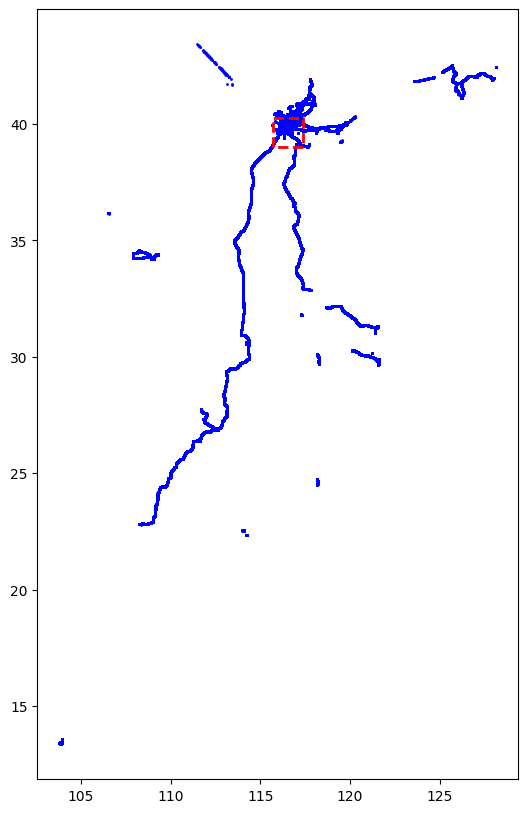

In [16]:
# Tworzenie wykresu
fig, ax = plt.subplots(figsize=(10, 10))

# Dodanie trajektorii do wykresu
traj_gdf.plot(ax=ax, color='blue', markersize=1, label='Trajektorie')

# Dodanie bbox do wykresu
bbox_gdf.boundary.plot(ax=ax, color='red', linewidth=2, linestyle='--', label='Bounding Box')

In [17]:
# # Dodanie mapy bazowej z contextily
# ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.Stamen.TonerLite)

# # Dostosowanie osi
# ax.set_xlim(min_longitude - 0.5, max_longitude + 0.5)
# ax.set_ylim(min_latitude - 0.5, max_latitude + 0.5)

# # Dodanie legendy
# plt.legend()

# # Wyświetlenie mapy
# plt.show()

NameError: name 'ctx' is not defined

# CLIP

In [18]:
traj_col = traj_col.clip(bbox)

<Axes: >

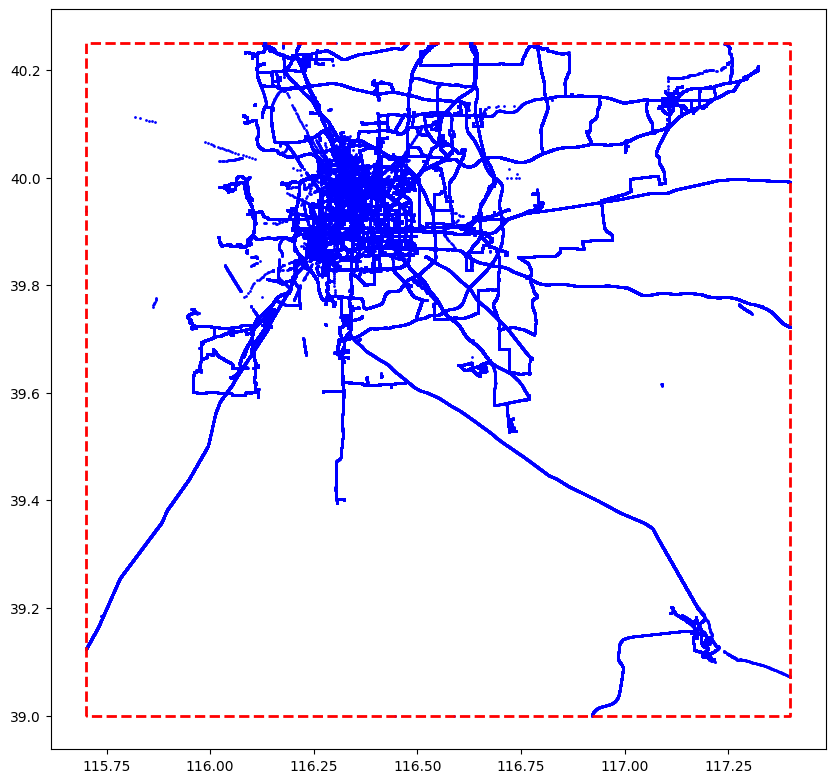

In [26]:
# Tworzenie wykresu
fig, ax = plt.subplots(figsize=(10, 10))

# Dodanie trajektorii do wykresu
traj_gdf.plot(ax=ax, color='blue', markersize=1, label='Trajektorie')

# Dodanie bbox do wykresu
bbox_gdf.boundary.plot(ax=ax, color='red', linewidth=2, linestyle='--', label='Bounding Box')

In [19]:
traj_col.add_speed(overwrite = True)

In [20]:
traj_col.add_timedelta(overwrite = True)

In [21]:
traj_col.add_direction(overwrite = True)

In [ ]:
# traj_col.trajectories[6].hvplot(**kwargs)+traj_col.trajectories[5].hvplot(**kwargs)

In [22]:
results = traj_col.to_point_gdf()
results.head()

,latitude,longitude,altitude,date,date_str,trajectory_id,mode,geometry,user_id,speed,timedelta,direction
time,,,,,,,,,,,,
2007-04-12 10:18:53,39.975517,116.330283,351.049869,39184.429780,2007-04-12,20070412101853_2007-04-12 10:18:53,unknown,POINT (116.33028 39.97552),161,0.467436,NaT,15.013958
2007-04-12 10:20:15,39.975850,116.330400,114.829396,39184.430729,2007-04-12,20070412101853_2007-04-12 10:18:53,unknown,POINT (116.33040 39.97585),161,0.467436,0 days 00:01:22,15.013958
2007-04-12 10:21:27,39.975983,116.330467,114.829396,39184.431563,2007-04-12,20070412101853_2007-04-12 10:18:53,unknown,POINT (116.33047 39.97598),161,0.220307,0 days 00:01:12,20.964677
2007-04-12 10:21:53,39.976100,116.330500,118.110236,39184.431863,2007-04-12,20070412101853_2007-04-12 10:18:53,unknown,POINT (116.33050 39.97610),161,0.510125,0 days 00:00:26,12.349827
2007-04-12 10:23:15,39.976233,116.330567,118.110236,39184.432813,2007-04-12,20070412101853_2007-04-12 10:18:53,unknown,POINT (116.33057 39.97623),161,0.193440,0 days 00:01:22,20.964607


In [23]:
results.shape

(2324641, 12)

In [24]:
results.to_parquet('geolife_points_med.parquet')

# [Generalization](https://movingpandas.github.io/movingpandas-website/1-tutorials/7-generalizing-trajectories.html)

In [27]:
# douglas-peucker
traj_col_dp = mpd.DouglasPeuckerGeneralizer(traj_col).generalize(tolerance=0.0001)

In [31]:
results_dp = traj_col_dp.to_point_gdf()
results_dp.shape

(151129, 12)

In [32]:
results_dp.to_parquet('geolife_points_dp.parquet')

In [58]:
i = 312
traj_col_dp.trajectories[i].hvplot(**kwargs)+traj_col.trajectories[i].hvplot(**kwargs)

:Layout
   .Overlay.I  :Overlay
      .WMTS.I   :WMTS   [Longitude,Latitude]
      .Path.I   :Path   [Longitude,Latitude]   (speed)
      .Points.I :Points   [Longitude,Latitude]   (speed,triangle_angle)
   .Overlay.II :Overlay
      .WMTS.I   :WMTS   [Longitude,Latitude]
      .Path.I   :Path   [Longitude,Latitude]   (speed)
      .Points.I :Points   [Longitude,Latitude]   (speed,triangle_angle)

# CLEAN

In [43]:
cleaned = traj_col_dp.copy()
cleaned = mpd.OutlierCleaner(cleaned).clean(alpha=1.5)

In [44]:
cleaned.trajectories[i].hvplot(**kwargs)+traj_col_dp.trajectories[i].hvplot(**kwargs)

:Layout
   .Overlay.I  :Overlay
      .WMTS.I   :WMTS   [Longitude,Latitude]
      .Path.I   :Path   [Longitude,Latitude]   (speed)
      .Points.I :Points   [Longitude,Latitude]   (speed,triangle_angle)
   .Overlay.II :Overlay
      .WMTS.I   :WMTS   [Longitude,Latitude]
      .Path.I   :Path   [Longitude,Latitude]   (speed)
      .Points.I :Points   [Longitude,Latitude]   (speed,triangle_angle)

# SMOOTH

In [45]:
smooth = mpd.KalmanSmootherCV(cleaned).smooth(process_noise_std=0.1, measurement_noise_std=10)
smooth

TrajectoryCollection with 1795 trajectories

In [46]:
smooth.trajectories[i].hvplot(**kwargs)+traj_col_dp.trajectories[i].hvplot(**kwargs)


:Layout
   .Overlay.I  :Overlay
      .WMTS.I   :WMTS   [Longitude,Latitude]
      .Path.I   :Path   [Longitude,Latitude]   (speed)
      .Points.I :Points   [Longitude,Latitude]   (speed,triangle_angle)
   .Overlay.II :Overlay
      .WMTS.I   :WMTS   [Longitude,Latitude]
      .Path.I   :Path   [Longitude,Latitude]   (speed)
      .Points.I :Points   [Longitude,Latitude]   (speed,triangle_angle)

In [64]:
smooth2 = mpd.KalmanSmootherCV(cleaned).smooth(process_noise_std=0.1, measurement_noise_std=2)
smooth2

TrajectoryCollection with 1795 trajectories

In [65]:
smooth.trajectories[i].hvplot(**kwargs)+smooth2.trajectories[i].hvplot(**kwargs)+traj_col_dp.trajectories[i].hvplot(**kwargs)


:Layout
   .Overlay.I   :Overlay
      .WMTS.I   :WMTS   [Longitude,Latitude]
      .Path.I   :Path   [Longitude,Latitude]   (speed)
      .Points.I :Points   [Longitude,Latitude]   (speed,triangle_angle)
   .Overlay.II  :Overlay
      .WMTS.I   :WMTS   [Longitude,Latitude]
      .Path.I   :Path   [Longitude,Latitude]   (speed)
      .Points.I :Points   [Longitude,Latitude]   (speed,triangle_angle)
   .Overlay.III :Overlay
      .WMTS.I   :WMTS   [Longitude,Latitude]
      .Path.I   :Path   [Longitude,Latitude]   (speed)
      .Points.I :Points   [Longitude,Latitude]   (speed,triangle_angle)

In [70]:
i = 1645
smooth.trajectories[i].hvplot(**kwargs)+smooth2.trajectories[i].hvplot(**kwargs)+traj_col_dp.trajectories[i].hvplot(**kwargs)

:Layout
   .Overlay.I   :Overlay
      .WMTS.I   :WMTS   [Longitude,Latitude]
      .Path.I   :Path   [Longitude,Latitude]   (speed)
      .Points.I :Points   [Longitude,Latitude]   (speed,triangle_angle)
   .Overlay.II  :Overlay
      .WMTS.I   :WMTS   [Longitude,Latitude]
      .Path.I   :Path   [Longitude,Latitude]   (speed)
      .Points.I :Points   [Longitude,Latitude]   (speed,triangle_angle)
   .Overlay.III :Overlay
      .WMTS.I   :WMTS   [Longitude,Latitude]
      .Path.I   :Path   [Longitude,Latitude]   (speed)
      .Points.I :Points   [Longitude,Latitude]   (speed,triangle_angle)

In [71]:
smooth2_gdf = smooth2.to_point_gdf()
smooth2_gdf.shape

(149173, 12)

In [72]:
smooth2_gdf.to_parquet('geolife_points_smooth.parquet')